Loading the images

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id1 = '1Sy-JCvuIPR69q1EF8_CeTqImCaVV9PjF'
downloaded1 = drive.CreateFile({'id': file_id1})
downloaded1.GetContentFile('Barbara.png')

file_id2 = '1Jp65Rrn6UE8NQJNdWJ1JnyAB2V2k-pYC'
downloaded2 = drive.CreateFile({'id': file_id2})
downloaded2.GetContentFile('Barbara_Ground_truth.png')  


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
srimg = cv2.imread('Barbara.png')
gtimg = cv2.imread('Barbara_Ground_truth.png')

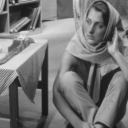

In [ ]:
cv2_imshow(srimg)

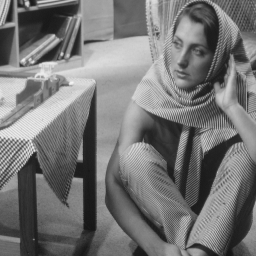

In [ ]:
cv2_imshow(gtimg)

In [ ]:
srimg.shape

(128, 128, 3)

In [ ]:
gtimg.shape

(256, 256, 3)

In [ ]:
gtimg2 = cv2.resize(gtimg, (128,128))

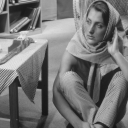

In [ ]:
cv2_imshow(gtimg2)

Finding SNR 

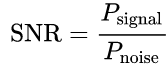

1. Using a library:

In [ ]:
# !pip install scipy

In [ ]:
import numpy as np
import scipy.io

In [ ]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
#enter the file name 
dat = scipy.io.loadmat('<Filename>.dat')
arr = dat['dn']
snr = signaltonoise(arr)


2. By writing a function

There are several options (and definitions) for the calculation of the SNR of or in an image.

First, there are two incompatible definitions of the SNR: SNR is frequently (e. g., in many engineering applications) defined as the **ratio of the signal power and the noise power**, but – particularly in imaging – an alternative definition can be found, where SNR is given as the **`ratio of the mean value of the signal and the standard deviation of the noise`**.
The power ratio (first definition above) is frequently expressed in dB (using the logarithm), while the signal ratio (second definition) is more often given as a number (of dimension 1).



Using the 1st approach:

In [ ]:
def snr1(gtruth_img, supresol_img):
  if(gtruth_img.shape!= supresol_img.shape):
    return -999
  a = gtruth_img.shape[0]
  b = gtruth_img.shape[1]
  N = a*b
  noise_img = supresol_img - gtruth_img
  Pn = (1/N)*sum(sum(noise_img*noise_img))[0]
  Ps = (1/N)*sum(sum(gtruth_img*gtruth_img))[0]
  if Pn == 0:
    return 100.0

  return 10 * np.log10(Ps/Pn)


Using the 2nd approach:


In [ ]:
def snr2(gtruth_img, supresol_img):
  if(gtruth_img.shape!= supresol_img.shape):
    return -999
  a = gtruth_img.shape[0]
  b = gtruth_img.shape[1]
  N = a*b
  noise_img = supresol_img - gtruth_img

  Pn = np.sqrt(np.mean( (noise_img) ** 2 ))
  Ps = np.mean(gtruth_img)
  if Ps == 0:
    return 100.0

  return 20 * np.log10((Ps)/Pn)


In [ ]:
snr_value2 = snr2(gtimg2, srimg)

In [ ]:
snr_value2

32.49688228341384